In [12]:
import pandas as pd
df = pd.read_csv('cleaned_large_english_augmented.csv')
print("Dataset loaded successfully. First 5 rows:")
print(df.head())

Dataset loaded successfully. First 5 rows:
                                                text  \
0                        Here for sinu han (lookism)   
1  Te da una patada uno y viene medio pueblo a pr...   
2  I just saw something on cardi b? Why her booti...   
3                         I found Camilla 2.0 my BM❤   
4                       1:14 best part I loved this!   

                                               clean     label  prob_neg  \
0                                   sinu han lookism   NEUTRAL  0.176545   
1  te da una patada uno viene medio pueblo provoc...   NEUTRAL  0.181679   
2                    saw something cardi bootie flat   NEUTRAL  0.122183   
3                                   found camilla bm   NEUTRAL  0.072816   
4                                       14 best part  POSITIVE  0.016911   

   prob_neu  prob_pos  max_conf  text_length  word_count  contains_emoji  \
0  0.703188  0.120267  0.703188           27           5               0   
1  0.778451

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            8000 non-null   object 
 1   clean           8000 non-null   object 
 2   label           8000 non-null   object 
 3   prob_neg        8000 non-null   float64
 4   prob_neu        8000 non-null   float64
 5   prob_pos        8000 non-null   float64
 6   max_conf        8000 non-null   float64
 7   text_length     8000 non-null   int64  
 8   word_count      8000 non-null   int64  
 9   contains_emoji  8000 non-null   int64  
 10  language        8000 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 687.6+ KB


In [14]:
df.describe()

,prob_neg,prob_neu,prob_pos,max_conf,text_length,word_count,contains_emoji
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.192005,0.357637,0.450358,0.828178,162.986875,30.651000,0.301875
std,0.312212,0.317013,0.397971,0.093619,728.197677,138.102177,0.459100
min,0.000824,0.009959,0.002370,0.650264,8.000000,3.000000,0.000000
25%,0.006060,0.093825,0.057345,0.752483,33.000000,6.000000,0.000000
50%,0.028522,0.214342,0.235362,0.834562,53.000000,10.000000,0.000000
75%,0.153101,0.730809,0.865293,0.906486,88.000000,17.000000,1.000000
max,0.978940,0.950031,0.988921,0.988921,9703.000000,1909.000000,1.000000


In [15]:
df.isnull().sum()

,0
text,0
clean,0
label,0
prob_neg,0
prob_neu,0
prob_pos,0
max_conf,0
text_length,0
word_count,0
contains_emoji,0


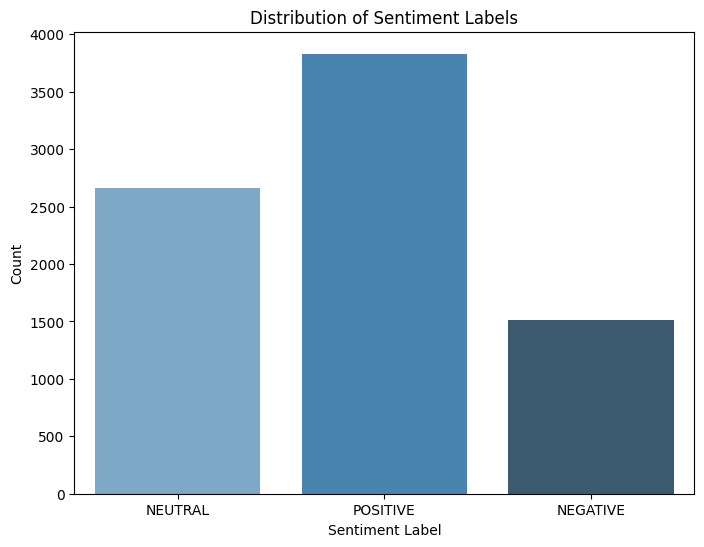

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, hue='label', legend=False, palette='Blues_d')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [17]:
print(df.columns)

Index(['text', 'clean', 'label', 'prob_neg', 'prob_neu', 'prob_pos',
       'max_conf', 'text_length', 'word_count', 'contains_emoji', 'language'],
      dtype='object')


In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

print("Libraries imported and preprocess_text function defined.")

Libraries imported and preprocess_text function defined.


In [19]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
print("Text preprocessing applied and 'cleaned_text' column created. First 5 rows:")
print(df[['text', 'cleaned_text']].head())

Text preprocessing applied and 'cleaned_text' column created. First 5 rows:
                                                text  \
0                        Here for sinu han (lookism)   
1  Te da una patada uno y viene medio pueblo a pr...   
2  I just saw something on cardi b? Why her booti...   
3                         I found Camilla 2.0 my BM❤   
4                       1:14 best part I loved this!   

                                        cleaned_text  
0                                   sinu han lookism  
1  te da una patada uno vien medio pueblo provoca...  
2                      saw someth cardi b booti flat  
3                                   found camilla bm  
4                                     best part love  


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

print("Text data successfully converted to numerical features using TF-IDF Vectorizer.")
print("Shape of the feature matrix (X):", X.shape)

Text data successfully converted to numerical features using TF-IDF Vectorizer.
Shape of the feature matrix (X): (8000, 9414)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors (KNN) model trained successfully.")

K-Nearest Neighbors (KNN) model trained successfully.


In [24]:
y_pred_knn = knn_model.predict(X_test)

print("Predictions made on the test set using KNN model.")

Predictions made on the test set using KNN model.


KNN Model Performance:
Accuracy: 0.8869
Precision: 0.8863
Recall: 0.8869
F1-Score: 0.8863


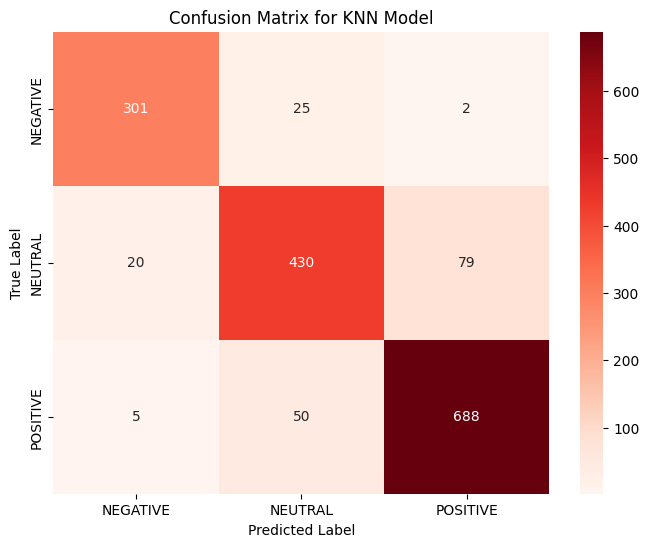

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

print(f"KNN Model Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Model')
plt.show()